__References__
    
- https://github.com/newhiwoong/PyTorch/blob/master/06_Batch_Training.ipynb
- https://wingnim.tistory.com/33

# Custom Dataset 만들기
- class my_dataset(torch.utils.data.Dataset):
  - def __init__(self, 내가 필요한 것들)
    - 데이터 가져오기
    - 전처리
    - 다운로드 등
  - def __len__(self)
    - 데이터셋의 사이즈를 넘겨주는 파트(길이)
  - def __getitem__(self, idx)
    - 데이터셋에서 한개의 데이터를 가져오는 함수를 정의한다

In [12]:
import torch
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

In [246]:
data = np.load('./data/hilbert_300_normal_train/drive_de_ball_1.npy')

In [247]:
print('train:', data.shape)

train: (100, 50, 50)


[[-0.07309581  0.02501501  0.00406088 ... -0.12686184 -0.04515697
  -0.03216216]
 [-0.04353261  0.08495357  0.02582719 ...  0.10103465 -0.03248703
  -0.12978567]
 [ 0.06107561  0.10980615 -0.05003002 ...  0.02241605  0.03443625
  -0.09453725]
 ...
 [ 0.1539885  -0.04385749  0.00519792 ...  0.04954271  0.07049685
   0.02339066]
 [ 0.10899397  0.11402946  0.04970515 ... -0.11305485 -0.04564427
  -0.01510647]
 [-0.03524842  0.01396942  0.03979661 ...  0.10671988  0.10736962
   0.1179279 ]]


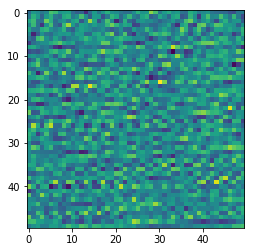

In [248]:
plt.imshow(data[50]) ; print(data[50])

--------------

In [165]:
ex2 = torch.from_numpy(data).float() # 이렇게해야 torch.float32 데이터 타입으로 바뀐다.

In [186]:
ex2.shape

torch.Size([100, 50, 50])

In [240]:
idx = np.random.randint(0,100)

ex2[idx]

tensor([[ 0.0942, -0.0931, -0.0419,  ..., -0.0177,  0.1395,  0.1493],
        [-0.0908, -0.1421,  0.0820,  ..., -0.0869, -0.0614, -0.0010],
        [-0.0193,  0.0057, -0.0149,  ..., -0.0778,  0.0257, -0.1314],
        ...,
        [-0.1273,  0.0499, -0.0240,  ...,  0.1241,  0.0263,  0.0637],
        [ 0.1455,  0.0879,  0.0398,  ...,  0.0070,  0.0197, -0.0185],
        [ 0.0478,  0.0975,  0.0006,  ..., -0.1296, -0.0469,  0.0315]])

In [188]:
ex2[20].shape

torch.Size([50, 50])

In [189]:
len(ex2)

100

------------

In [266]:
class MyDataset(Dataset):
    def __init__(self):
        data = np.load('./data/hilbert_300_normal_train/drive_de_ball_1.npy')
        self.train = torch.from_numpy(data).float()
        
    def __getitem__(self, index):
        x = self.train[index]
        return x
        
    def __len__(self):
        return len(self.train)

In [267]:
dataset = MyDataset()

In [268]:
train_loader = DataLoader(dataset=dataset,
                         batch_size=10, shuffle=True)

In [282]:
i1= next(iter(train_loader))
print(i1.shape)

torch.Size([10, 50, 50])


In [288]:
for i, data in enumerate(train_loader):
    print(i)
    print(data.shape)

0
torch.Size([10, 50, 50])
1
torch.Size([10, 50, 50])
2
torch.Size([10, 50, 50])
3
torch.Size([10, 50, 50])
4
torch.Size([10, 50, 50])
5
torch.Size([10, 50, 50])
6
torch.Size([10, 50, 50])
7
torch.Size([10, 50, 50])
8
torch.Size([10, 50, 50])
9
torch.Size([10, 50, 50])
